**Importing important libraries**

In [7]:
!pip install tweepy
import tweepy
import pandas as pd
import time
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

**Twitter API credentials**

In [8]:
API_KEY = "QQgskL91HywEZJz0CdQeNYL5q"
API_SECRET_KEY = "enXAvqG38N29t9BVlRFi2Y4HJ5dLjEkYNwKvq9pp84zuDopXhw"
ACCESS_TOKEN = "1859322472329510913-qXsgHb6FMielSK2PlRt7HeNdxHFQFc"
ACCESS_TOKEN_SECRET = "PJEQlaWErCTXOXZTagknKMIVRsGYctlh1rsrHZC5nXww9"
bearer_token = "AAAAAAAAAAAAAAAAAAAAABRZxAEAAAAArEFce%2BENG4lTqoKk%2FqKcTFrSHcA%3DUD9vdMWW8jaZXWCPaeIMLsx6o7UkRYOUPijaCMz2gVDTvB3Azh"

**Authenticate with Twitter API**

In [9]:
auth = tweepy.OAuth1UserHandler(API_KEY, API_SECRET_KEY, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAABRZxAEAAAAArEFce%2BENG4lTqoKk%2FqKcTFrSHcA%3DUD9vdMWW8jaZXWCPaeIMLsx6o7UkRYOUPijaCMz2gVDTvB3Azh')

**Function to scrape tweets**

In [10]:
def scrape_tweets(keyword, max_tweets):
    tweets_list = []
    # Use the search_recent_tweets method from the Client object
    for tweet in tweepy.Paginator(api.search_recent_tweets, query=keyword, tweet_fields=['created_at', 'text', 'public_metrics', 'author_id', 'geo'],
                                  user_fields=['name', 'username', 'location'], max_results=100).flatten(limit=max_tweets):
        tweets_list.append({
            "Date": tweet.created_at,
            "User": tweet.author_id,  # Access user ID instead of screen name
            "Tweet": tweet.text,      # Access tweet text instead of full_text
            "Likes": tweet.public_metrics['like_count'],
            "Retweets": tweet.public_metrics['retweet_count'],
            "Location": tweet.geo # Access user's location from user_fields
        })
        time.sleep(5)
    return pd.DataFrame(tweets_list)


**Scrape tweets based on a keyword or hashtag**

In [ ]:
if __name__ == "__main__":
    keyword = "stock market"
    max_tweets = 100  # Number of tweets to scrape
    tweets_df = scrape_tweets(keyword, max_tweets)
    print(tweets_df) # print to see output

**Save to CSV**

In [ ]:
tweets_df.to_csv("tweets.csv", index=False)

In [17]:
data=pd.read_csv("/content/tweets.csv")
data

,Date,User,Tweet,Likes,Retweets,Location
0,2024-11-20 21:52:37+00:00,981528706765213696,RT @PressTV: Wall St falls as Russia-Ukraine t...,0,6,NaN
1,2024-11-20 21:52:37+00:00,1846044709304582144,RT @TraderGirlQ: READY TO FLIP THE SWITCH⁉️⁉️\...,0,101,NaN
2,2024-11-20 21:52:33+00:00,1472996940916875265,RT @spacefroot: /flip_stock_market https://t.c...,0,14,NaN
3,2024-11-20 21:52:32+00:00,851303646,"@MasterLibTrig @AdamLowisz @elonmusk Uh, Trump...",0,0,NaN
4,2024-11-20 21:52:31+00:00,1358293022,RT @trouble_man90: It’s insane that we are goi...,0,5366,NaN
...,...,...,...,...,...,...
95,2024-11-20 21:49:09+00:00,1085734616575528960,RT @TeslaFraud: There's a reason why none of t...,0,3,NaN
96,2024-11-20 21:49:07+00:00,40087180,RT @trouble_man90: It’s insane that we are goi...,0,5366,NaN
97,2024-11-20 21:48:58+00:00,1754876843738411008,Total US stock market capitalization has hit $...,0,0,NaN
98,2024-11-20 21:48:57+00:00,1578811043400355840,"RT @wight_petals: this just in, $mstr trading ...",0,1,NaN


**Downloading required NLTK resources**

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Data Cleaning**

In [20]:
def clean_tweet(tweet):
    """Clean the text in a tweet."""
    # Remove URLs, mentions, hashtags, special characters
    tweet = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", "", tweet)
    tweet = tweet.lower()  # Convert to lowercase
    # Tokenize and remove stopwords
    tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_words)


**Drop unnecessary columns and clean tweets**

In [21]:
data_cleaned = data.drop(columns=['Location'], errors='ignore')
data_cleaned = data_cleaned[~data_cleaned['Tweet'].str.startswith("RT")]
data_cleaned['Cleaned_Tweet'] = data_cleaned['Tweet'].apply(clean_tweet)

**Remove dublicate tweets**

In [22]:
data_cleaned = data_cleaned.drop_duplicates(subset=['Cleaned_Tweet'])

In [23]:
data_cleaned

,Date,User,Tweet,Likes,Retweets,Cleaned_Tweet
3,2024-11-20 21:52:32+00:00,851303646,"@MasterLibTrig @AdamLowisz @elonmusk Uh, Trump...",0,0,uh trump told us repeatedly would style stock ...
10,2024-11-20 21:52:03+00:00,1828679047871926272,Total value of the US stock market cap is at a...,0,0,total value us stock market cap record high tr...
11,2024-11-20 21:52:02+00:00,1597651656400830465,@madaznfootballr NVIDIA delivered strong Q3 re...,0,0,nvidia delivered strong q results q guidance b...
12,2024-11-20 21:52:00+00:00,3000163121,"@Nafa_Nuksan That's wild, makes you wonder how...",0,0,thats wild makes wonder much longer itll take ...
20,2024-11-20 21:51:45+00:00,1640734913585373185,CNBC- How Trump dancing affects gas prices and...,0,0,cnbc trump dancing affects gas prices would co...
30,2024-11-20 21:51:23+00:00,1793246357324435456,@Theragem1 @DetTomato @Kandy11Kane DS plan to ...,0,0,ds plan crash stock market trump takes office
32,2024-11-20 21:51:20+00:00,3194263002,@nickwright3232 @talentsprint Sounds like a pr...,0,0,sounds like pretty sweet resource people wanti...
36,2024-11-20 21:51:04+00:00,737031383936172032,Stock Market Today: Investors Digest Nvidia Ea...,0,0,stock market today investors digest nvidia ear...
38,2024-11-20 21:51:00+00:00,1412115180742402050,📈 Want to grow your wealth? The stock market i...,0,0,want grow wealth stock market longterm game le...
39,2024-11-20 21:50:59+00:00,1224376633391566850,☆☆☆ STOP GLOATING !☆☆☆ BOTH PARTIES OWN IT!- N...,0,0,stop gloating parties national debts moblike o...


**Sentiment Analysis**

In [24]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(tweet):
    """Analyze sentiment polarity using VADER."""
    sentiment_score = sia.polarity_scores(tweet)
    return sentiment_score['compound']

**Apply sentiment analysis**

In [25]:
data_cleaned['Sentiment_Score'] = data_cleaned['Cleaned_Tweet'].apply(analyze_sentiment)

**Label sentiment**

In [26]:
data_cleaned['Sentiment_Label'] = data_cleaned['Sentiment_Score'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

**Visualisation of Sentiment distribution**

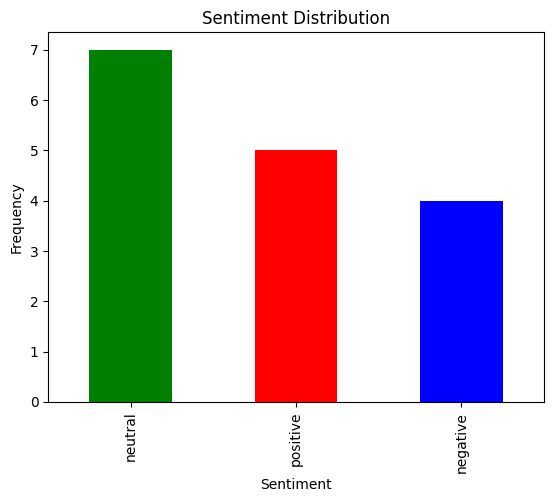

In [27]:
import matplotlib.pyplot as plt

data_cleaned['Sentiment_Label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

**Save the cleaned data with sentiment analysis**

In [28]:
data_cleaned.to_csv('cleaned_tweets.csv', index=False)

In [29]:
df=pd.read_csv("cleaned_tweets.csv")
df

,Date,User,Tweet,Likes,Retweets,Cleaned_Tweet,Sentiment_Score,Sentiment_Label
0,2024-11-20 21:52:32+00:00,851303646,"@MasterLibTrig @AdamLowisz @elonmusk Uh, Trump...",0,0,uh trump told us repeatedly would style stock ...,-0.2197,negative
1,2024-11-20 21:52:03+00:00,1828679047871926272,Total value of the US stock market cap is at a...,0,0,total value us stock market cap record high tr...,0.3400,positive
2,2024-11-20 21:52:02+00:00,1597651656400830465,@madaznfootballr NVIDIA delivered strong Q3 re...,0,0,nvidia delivered strong q results q guidance b...,0.6486,positive
3,2024-11-20 21:52:00+00:00,3000163121,"@Nafa_Nuksan That's wild, makes you wonder how...",0,0,thats wild makes wonder much longer itll take ...,0.0000,neutral
4,2024-11-20 21:51:45+00:00,1640734913585373185,CNBC- How Trump dancing affects gas prices and...,0,0,cnbc trump dancing affects gas prices would co...,0.0000,neutral
5,2024-11-20 21:51:23+00:00,1793246357324435456,@Theragem1 @DetTomato @Kandy11Kane DS plan to ...,0,0,ds plan crash stock market trump takes office,-0.4019,negative
6,2024-11-20 21:51:20+00:00,3194263002,@nickwright3232 @talentsprint Sounds like a pr...,0,0,sounds like pretty sweet resource people wanti...,0.8860,positive
7,2024-11-20 21:51:04+00:00,737031383936172032,Stock Market Today: Investors Digest Nvidia Ea...,0,0,stock market today investors digest nvidia ear...,0.0000,neutral
8,2024-11-20 21:51:00+00:00,1412115180742402050,📈 Want to grow your wealth? The stock market i...,0,0,want grow wealth stock market longterm game le...,0.7579,positive
9,2024-11-20 21:50:59+00:00,1224376633391566850,☆☆☆ STOP GLOATING !☆☆☆ BOTH PARTIES OWN IT!- N...,0,0,stop gloating parties national debts moblike o...,-0.6705,negative


**Shape of cleaned tweets**

In [ ]:
df.shape

(16, 9)

**Importing important libraries for model prediction**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

**Feature Engineering**

In [31]:
# Use Sentiment_Score, Likes, Retweets as input features
df['Target'] = np.where(df['Sentiment_Score'] > 0, 1, 0)  # Assume positive sentiment leads to stock rise (1), else fall (0)
features = ['Sentiment_Score', 'Likes', 'Retweets']
X = df[features]
y = df['Target']

**Split the data into training and testing sets**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialize the model**

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

**Train the model**

In [34]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
X_train

,Sentiment_Score,Likes,Retweets
13,0.0000,0,0
11,-0.4939,0,0
8,0.7579,0,0
9,-0.6705,0,0
2,0.6486,0,0
15,0.0000,0,0
4,0.0000,0,0
7,0.0000,0,0
10,0.0000,0,0
12,0.6124,0,0


In [36]:
X_test

,Sentiment_Score,Likes,Retweets
0,-0.2197,0,0
1,0.3400,0,0
5,-0.4019,0,0
14,0.0000,0,0


**Make predictions**

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([0, 1, 0, 0])

**Evaluate the model**

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

**Display evaluation metrics**

In [40]:
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


**Confusion Matrix**

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[3 0]
 [0 1]]


**Classification Report**

In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**Stock Movement Prediction Performance**

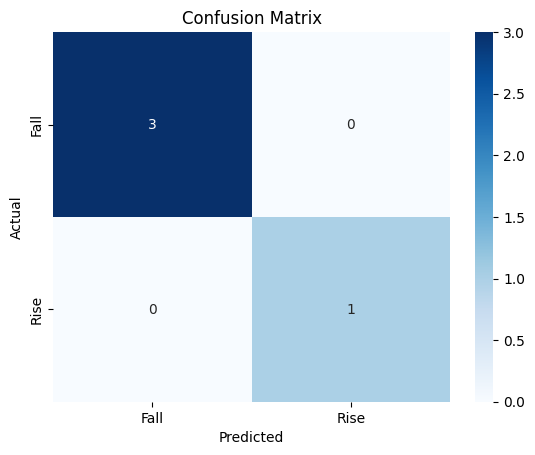

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fall', 'Rise'], yticklabels=['Fall', 'Rise'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Scatter plot: Sentiment vs Stock Movement**

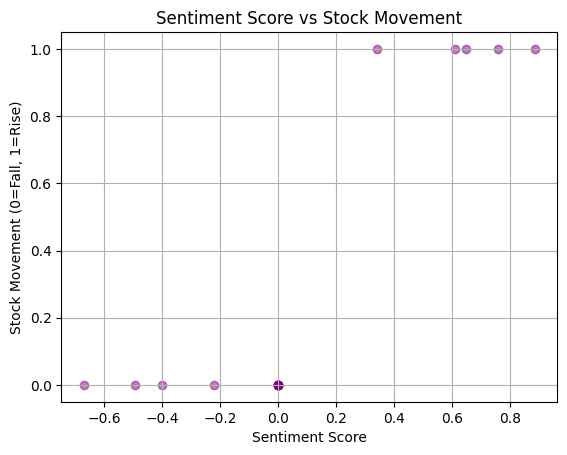

In [46]:
plt.scatter(data_cleaned['Sentiment_Score'], df['Target'], alpha=0.5, color='purple')
plt.title("Sentiment Score vs Stock Movement")
plt.xlabel("Sentiment Score")
plt.ylabel("Stock Movement (0=Fall, 1=Rise)")
plt.grid()
plt.show()
